In [1]:
from RealtyModule import Get_Zillow_Data, Get_Homes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
House_df = pd.read_excel("HouseHuntersData.xlsx")

In [77]:
House_df.describe()

,Zip Code,Asking Price,Zestimate,Lot Size (in acres),Square Feet,Bedrooms,Bathrooms,Year Built
count,716.000000,7.140000e+02,6.420000e+02,680.000000,710.000000,716.000000,711.000000,713.000000
mean,30317.398045,9.812844e+05,9.203646e+05,21445.042647,3031.308451,3.578212,3.482419,1971.113604
std,11.489098,1.597537e+06,1.357093e+06,49038.555176,2865.050723,1.480229,2.191382,34.954541
min,30303.000000,2.900000e+04,4.099100e+04,1.000000,100.000000,0.000000,1.000000,1886.000000
25%,30308.000000,2.750000e+05,2.786025e+05,4301.250000,1354.750000,3.000000,2.000000,1940.000000
50%,30315.000000,4.699500e+05,4.874405e+05,8712.000000,2054.500000,3.000000,3.000000,1972.000000
75%,30327.000000,9.865000e+05,1.038018e+06,19340.000000,3548.750000,4.000000,4.000000,2005.000000
max,30363.000000,2.100000e+07,2.082331e+07,740084.000000,34688.000000,11.000000,13.000000,2019.000000


In [79]:
House_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 10 columns):
Address                716 non-null object
Zip Code               716 non-null int64
Asking Price           714 non-null float64
Zestimate              642 non-null float64
Lot Size (in acres)    680 non-null float64
Square Feet            710 non-null float64
Bedrooms               716 non-null int64
Bathrooms              711 non-null float64
Year Built             713 non-null float64
Home Type              716 non-null object
dtypes: float64(6), int64(2), object(2)
memory usage: 56.0+ KB


In [82]:
House_df.isnull().sum(0)

Address                 0
Zip Code                0
Asking Price            2
Zestimate              74
Lot Size (in acres)    36
Square Feet             6
Bedrooms                0
Bathrooms               5
Year Built              3
Home Type               0
dtype: int64

In [80]:
House_df2 = House_df.dropna(axis=0,how='any')

In [85]:
House_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 1 to 715
Data columns (total 10 columns):
Address                612 non-null object
Zip Code               612 non-null int64
Asking Price           612 non-null float64
Zestimate              612 non-null float64
Lot Size (in acres)    612 non-null float64
Square Feet            612 non-null float64
Bedrooms               612 non-null int64
Bathrooms              612 non-null float64
Year Built             612 non-null float64
Home Type              612 non-null object
dtypes: float64(6), int64(2), object(2)
memory usage: 52.6+ KB


In [7]:
House_df2

,Address,Zip Code,Asking Price,Zestimate,Lot Size (in acres),Square Feet,Bedrooms,Bathrooms,Year Built,Home Type
1,"5524 Stone Cove Dr SW, Atlanta, GA",30331,317000.0,312078.0,14374.0,5002.0,6,4.0,2007.0,SingleFamily
2,"45 Ivan Allen Jr Blvd NW UNIT 1901, Atlanta, GA",30308,545000.0,533631.0,1773.0,1774.0,2,3.0,2010.0,Condominium
3,"3300 Ferncliff Ln, Atlanta, GA",30324,527900.0,517626.0,871.0,1872.0,3,4.0,2012.0,Condominium
4,"229 Woodward Ave SE, Atlanta, GA",30312,487900.0,466183.0,2610.0,2040.0,4,3.0,2016.0,SingleFamily
5,"215 Peters St SW UNIT H, Atlanta, GA",30313,195000.0,184842.0,806.0,805.0,1,1.0,1898.0,Condominium
6,"537 Winton Ter NE, Atlanta, GA",30308,569900.0,562454.0,9670.0,2300.0,4,3.0,1920.0,SingleFamily
7,"620 Peachtree St NE APT 1204, Atlanta, GA",30308,289900.0,286055.0,1346.0,1344.0,3,2.0,1965.0,Condominium
8,"4415 Wieuca Rd NE, Atlanta, GA",30342,700000.0,675722.0,38332.0,3006.0,5,4.0,1960.0,SingleFamily
9,"485 Hillside Dr NW, Atlanta, GA",30342,1250000.0,1207264.0,44914.0,4399.0,5,5.0,1955.0,SingleFamily
10,"891 Kings Ct NE, Atlanta, GA",30306,1250000.0,1216022.0,8145.0,3036.0,4,4.0,2014.0,SingleFamily


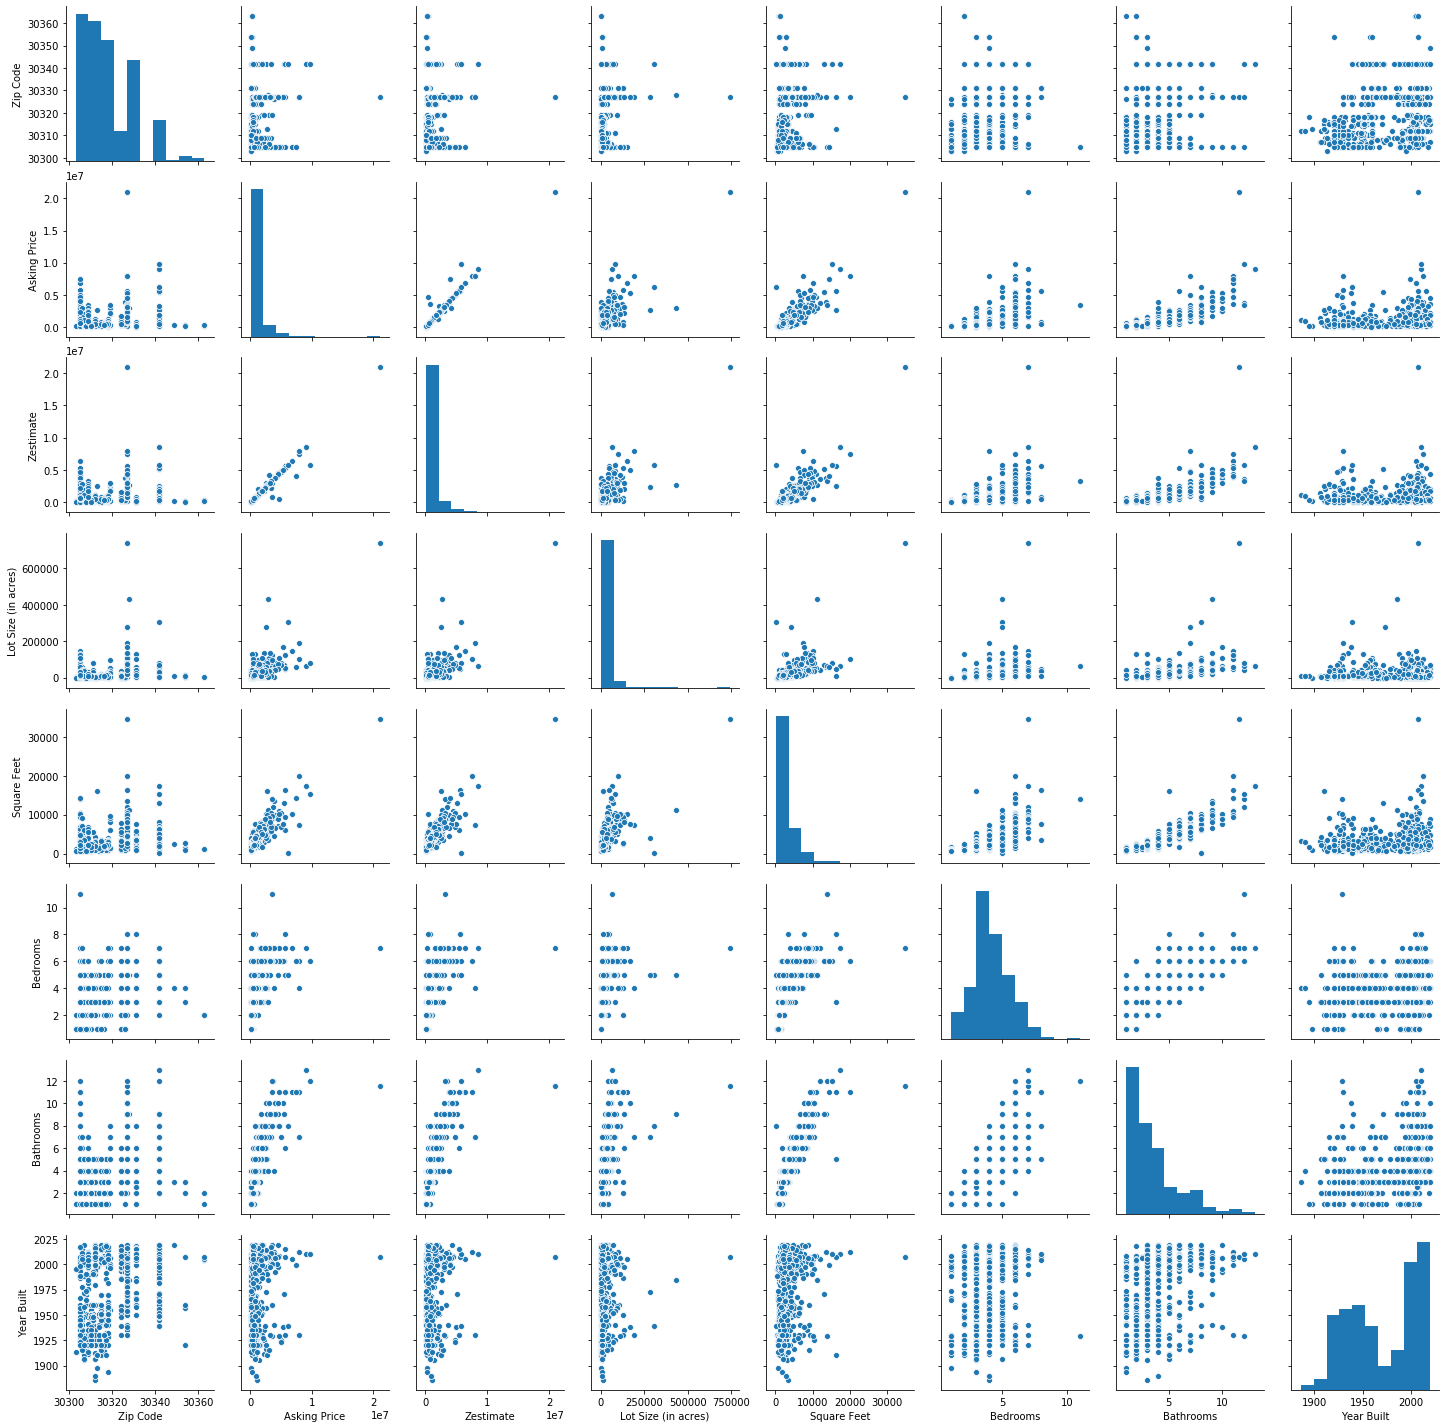

In [9]:
sns.pairplot(House_df2)

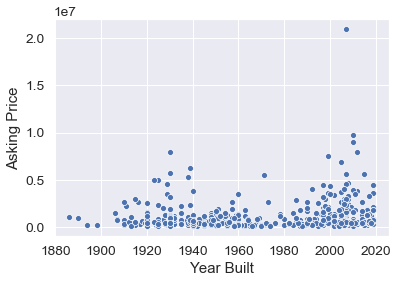

In [36]:
sns.scatterplot(x='Year Built', y='Asking Price', data=House_df2)

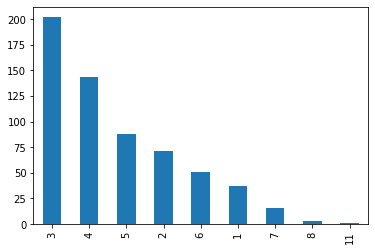

In [11]:
House_df2['Bedrooms'].value_counts().plot(kind='bar')

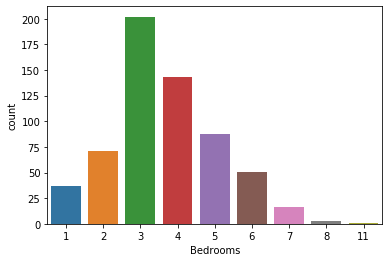

In [12]:
sns.countplot(x='Bedrooms',data=House_df2)

In [15]:
#%matplotlib inlinetrain = House_df2
#test = House_df2

UsageError: unrecognized arguments: = House_df2


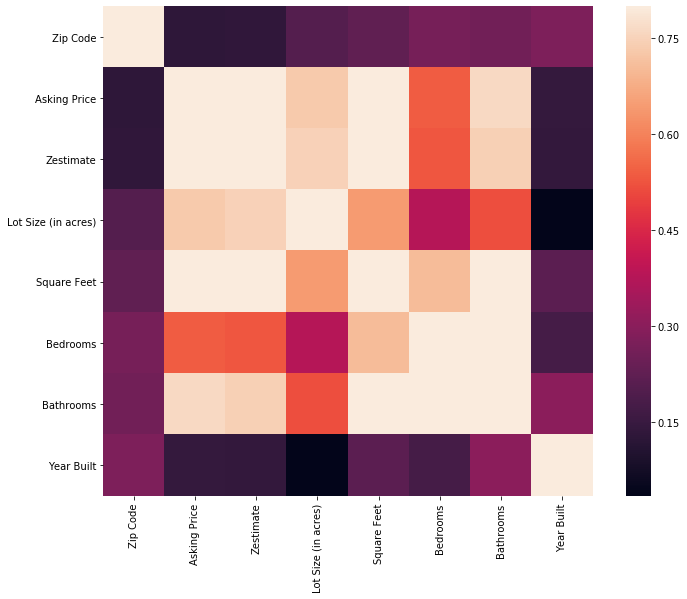

In [17]:
corrmat = House_df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

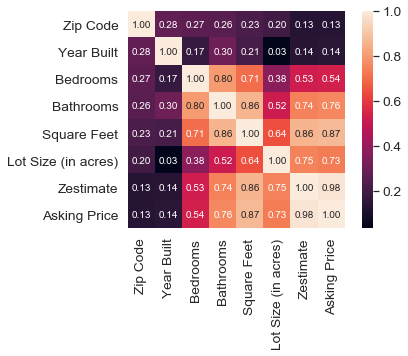

In [20]:
k = 10
cols = corrmat.nlargest(k, 'Zip Code')['Zip Code'].index
cm = np.corrcoef(House_df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

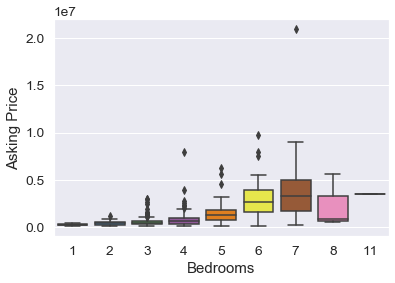

In [34]:
sns.boxplot(x='Bedrooms', y='Asking Price', data=House_df2,palette="Set1")

In [26]:
#new_df = House_df2
#new_df

,Address,Zip Code,Asking Price,Zestimate,Lot Size (in acres),Square Feet,Bedrooms,Bathrooms,Year Built,Home Type
1,"5524 Stone Cove Dr SW, Atlanta, GA",30331,317000.0,312078.0,14374.0,5002.0,6,4.0,2007.0,SingleFamily
2,"45 Ivan Allen Jr Blvd NW UNIT 1901, Atlanta, GA",30308,545000.0,533631.0,1773.0,1774.0,2,3.0,2010.0,Condominium
3,"3300 Ferncliff Ln, Atlanta, GA",30324,527900.0,517626.0,871.0,1872.0,3,4.0,2012.0,Condominium
4,"229 Woodward Ave SE, Atlanta, GA",30312,487900.0,466183.0,2610.0,2040.0,4,3.0,2016.0,SingleFamily
5,"215 Peters St SW UNIT H, Atlanta, GA",30313,195000.0,184842.0,806.0,805.0,1,1.0,1898.0,Condominium
6,"537 Winton Ter NE, Atlanta, GA",30308,569900.0,562454.0,9670.0,2300.0,4,3.0,1920.0,SingleFamily
7,"620 Peachtree St NE APT 1204, Atlanta, GA",30308,289900.0,286055.0,1346.0,1344.0,3,2.0,1965.0,Condominium
8,"4415 Wieuca Rd NE, Atlanta, GA",30342,700000.0,675722.0,38332.0,3006.0,5,4.0,1960.0,SingleFamily
9,"485 Hillside Dr NW, Atlanta, GA",30342,1250000.0,1207264.0,44914.0,4399.0,5,5.0,1955.0,SingleFamily
10,"891 Kings Ct NE, Atlanta, GA",30306,1250000.0,1216022.0,8145.0,3036.0,4,4.0,2014.0,SingleFamily


In [27]:
#new_df['Lot Size (in acres)'] = new_df['Lot Size (in acres)']*2

C:\Users\xing.shen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
#new_df

,Address,Zip Code,Asking Price,Zestimate,Lot Size (in acres),Square Feet,Bedrooms,Bathrooms,Year Built,Home Type
1,"5524 Stone Cove Dr SW, Atlanta, GA",30331,317000.0,312078.0,28748.0,5002.0,6,4.0,2007.0,SingleFamily
2,"45 Ivan Allen Jr Blvd NW UNIT 1901, Atlanta, GA",30308,545000.0,533631.0,3546.0,1774.0,2,3.0,2010.0,Condominium
3,"3300 Ferncliff Ln, Atlanta, GA",30324,527900.0,517626.0,1742.0,1872.0,3,4.0,2012.0,Condominium
4,"229 Woodward Ave SE, Atlanta, GA",30312,487900.0,466183.0,5220.0,2040.0,4,3.0,2016.0,SingleFamily
5,"215 Peters St SW UNIT H, Atlanta, GA",30313,195000.0,184842.0,1612.0,805.0,1,1.0,1898.0,Condominium
6,"537 Winton Ter NE, Atlanta, GA",30308,569900.0,562454.0,19340.0,2300.0,4,3.0,1920.0,SingleFamily
7,"620 Peachtree St NE APT 1204, Atlanta, GA",30308,289900.0,286055.0,2692.0,1344.0,3,2.0,1965.0,Condominium
8,"4415 Wieuca Rd NE, Atlanta, GA",30342,700000.0,675722.0,76664.0,3006.0,5,4.0,1960.0,SingleFamily
9,"485 Hillside Dr NW, Atlanta, GA",30342,1250000.0,1207264.0,89828.0,4399.0,5,5.0,1955.0,SingleFamily
10,"891 Kings Ct NE, Atlanta, GA",30306,1250000.0,1216022.0,16290.0,3036.0,4,4.0,2014.0,SingleFamily


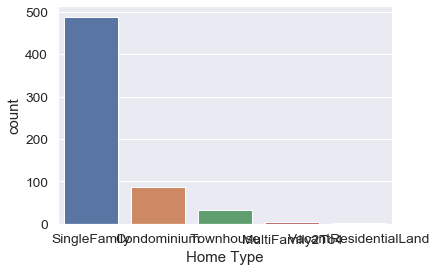

In [38]:
House_df2['Home Type'].value_counts()

SingleFamily             488
Condominium               86
Townhouse                 33
MultiFamily2To4            4
VacantResidentialLand      1
Name: Home Type, dtype: int64

In [48]:
Count_SingleFamily = House_df2['Home Type'].loc[House_df2['Home Type']=='SingleFamily'].count()
Count_Condominium = House_df2['Home Type'].loc[House_df2['Home Type']=='Condominium'].count()
Count_Townhouse = House_df2['Home Type'].loc[House_df2['Home Type']=='Townhouse'].count()
Count_MultiFamily2To4 = House_df2['Home Type'].loc[House_df2['Home Type']=='MultiFamily2To4'].count()
Count_VacantResidentialLand = House_df2['Home Type'].loc[House_df2['Home Type']=='VacantResidentialLand'].count()

print(Count_SingleFamily)
print(Count_Condominium)
print(Count_Townhouse)
print(Count_MultiFamily2To4)
print(Count_VacantResidentialLand)

488
86
33
4
1


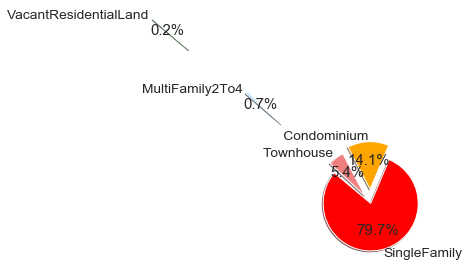

In [76]:
# Labels for the sections of our pie chart
labels = ["SingleFamily", "                     Condominium", "Townhouse", "MultiFamily2To4","VacantResidentialLand"]

# The values of each section of the pie chart
sizes = [Count_SingleFamily, Count_Condominium, Count_Townhouse, Count_MultiFamily2To4,Count_VacantResidentialLand]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue","green"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.3, 0.2, 2.5, 5)

fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

ax1.axis('equal')
plt.tight_layout()
plt.show()


In [91]:
df_year_vs_AvgPrice = House_df2.groupby(['Year Built']).mean()
df_year_vs_AvgPrice

,Zip Code,Asking Price,Zestimate,Lot Size (in acres),Square Feet,Bedrooms,Bathrooms
Year Built,,,,,,,
1886.0,30312.000000,1.099000e+06,1.071121e+06,11194.000000,3300.000000,4.000000,3.000000
1890.0,30312.000000,9.850000e+05,9.712980e+05,10018.000000,2938.000000,4.000000,4.000000
1894.0,30318.000000,2.250000e+05,2.974430e+05,8964.000000,1668.000000,3.000000,1.000000
1898.0,30313.000000,1.950000e+05,1.848420e+05,806.000000,805.000000,1.000000,1.000000
1906.0,30307.000000,1.449000e+06,1.394559e+06,7840.000000,3200.000000,3.000000,3.000000
1907.0,30309.500000,7.924950e+05,7.778780e+05,7274.000000,3236.000000,4.000000,3.500000
1910.0,30313.000000,8.983800e+05,8.593764e+05,5935.400000,4336.600000,2.400000,2.400000
1911.0,30309.000000,2.200000e+06,2.080241e+06,9639.000000,2988.000000,4.000000,5.000000
1912.0,30312.000000,4.900000e+05,4.849400e+05,4835.000000,1550.000000,2.000000,2.000000


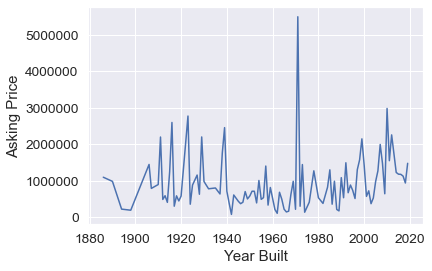

In [94]:
sns.lineplot(x=df_year_vs_AvgPrice.index,y="Asking Price",data=df_year_vs_AvgPrice)